# Housing Prices Prediction

![alt text](https://i.pinimg.com/originals/b0/87/f6/b087f63e81d905112fc646d21a9f326c.png)

## Preliminary Information

__Problem Statement:__ Given a dataset regarding houses in Ames, Iowa, use machine learning & data science techniques to predict prices for given houses

__About the Data:__
* There are 79 features in total
* Training set has 1460 examples & evaluation set has 1,458 examples
* Data is presented in a CSV format and is small enough to be locally downloaded. 

__Framing the Problem:__
* This problem is a SUPERVISED learning problem.
* Specifically, this problem is a REGRESSION problem. 
* Evaluation metric will be ROOT MEAN SQUARE ERROR (RSME).
* Data is small and stagnent so online learning systems are not needed. 
* No requirement on whether model has to be instance-based or model-based.
* Project will be used for learning purposes.

__How to solve without Machine Learning:__ You would probably utilize features such as the neighborhood and quality of the house as indicators on how the house should be priced. 

## Getting the Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the Data
FILENAME = '/Users/jinalshah/Jinal/Github Repos/House-Prices-Challenge-Solution/Data/'
train_data = pd.read_csv(FILENAME+'train.csv')
test_data = pd.read_csv(FILENAME+'test.csv')
submission_data = pd.read_csv(FILENAME+'sample_submission.csv')

In [3]:
# Making sure the data was stored nicely
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
submission_data

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


__Just a couple of Notes:__
* The target variable is "SalePrice".
* Submissons must include HouseId as well as predicted SalePrice.

## Exploratory Data Analysis (EDA)

In [6]:
# Creating a copy of the training set to experiment with
train_copy = train_data.copy()
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Dealing with Missing Values

In [7]:
# Creating a function that stores the percentage of missing values in each feature
def missing(data):
    missing_dict = {}
    
    for i in data.keys():
        missing_dict[i] = (data[i].isnull().sum()/data.shape[0]) * 100
    
    return missing_dict

In [8]:
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 93.76712328767123,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2

In [9]:
# Getting a list of features whose # of missing vals is above 80
def missing_vals_over_80(missing_vals):
    result = []
    for i in missing_vals.keys():
        if missing_vals[i] >= 80:
            result.append(i)
    
    return result

In [10]:
missing_over_80 = missing_vals_over_80(missing_vals)
missing_over_80

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

#### Fireplace Quality (FireplaceQu)

In [11]:
# FireplaceQu has quite a few missing values so I want to see if I should remove it
train_copy['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

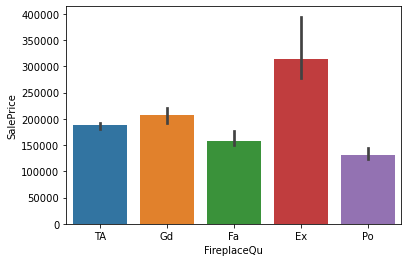

In [12]:
# Plotting FireplaceQu against SalePrice
sns.barplot(x='FireplaceQu',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

From the above plot, it is easy to identify that Fireplace Quality does play a big role in the Sale Price of a house. Houses with excellent Fireplaces generally sell for much higher prices, even though there are few houses with excellent quality Fireplaces.  
  
Instead of deleting FireplaceQu, I will replace the missing values with a 'NF' label, which represents that the house doesn't have a Fireplace.

In [13]:
def replace_missing(data,feature,replacement):
    temp = data[feature].fillna(replacement)
    return temp

In [14]:
train_copy['FireplaceQu'] = replace_missing(train_copy,'FireplaceQu','NF')
train_copy['FireplaceQu'].isnull().sum()

0

In [15]:
# Removing the features who have over 80% missing values
train_copy = train_copy.drop(missing_over_80,axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
# Taking a look at the updated missing values dictionary
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF

In [17]:
# Creating a function that returns a dict with only the missing features
def only_missing(missing):
    only_missing = {}
    for i in missing.keys():
        if missing[i] > 0:
            only_missing[i] = missing[i]
    return only_missing

In [18]:
missing_vals = only_missing(missing_vals)
missing_vals

{'LotFrontage': 17.73972602739726,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525}

In [19]:
train_copy[missing_vals.keys()].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [20]:
# Separating the floats from the objects
missing_floats = []
missing_obj = []

for i in missing_vals.keys():
    if train_copy[i].dtype == np.float64:
        missing_floats.append(i)
    else:
        missing_obj.append(i)

In [21]:
# Checking if the features were separated properly
missing_floats, missing_obj

(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 ['MasVnrType',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond'])

#### Experimenting with the float features with missing values

In [22]:
# Checking to see if GarageYrBlt is truly numerical
train_copy['GarageYrBlt'].value_counts().sort_values(ascending=False)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1900.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

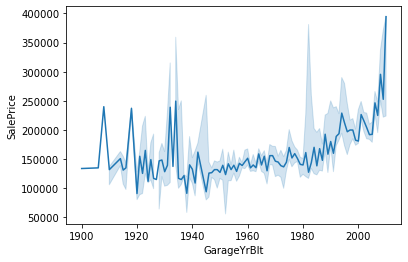

In [23]:
# Checking to see if the year the garage was built has any impact on sale price
sns.lineplot(x='GarageYrBlt',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

Note: The year the garage was built ranges from 1900 to 2010.  
  
Note: GarageYrBlt is categorical, not numerical.

##### Experimenting with combining garage years and storing them as decades

In [24]:
int((train_copy['GarageYrBlt'][0]) / 10) * 10

2000

In [25]:
train_copy['GarageYrBltDec'] = train_copy['GarageYrBlt']
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2003.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1976.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2001.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1998.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1999.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1978.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1941.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [26]:
# Changing all the values in GarageYrBlt to decades
for i in range(train_copy.shape[0]):
    try:
         train_copy['GarageYrBltDec'][i] = int((train_copy['GarageYrBlt'][i]) / 10) * 10
    except:
        train_copy['GarageYrBltDec'][i] = np.nan

train_copy

<ipython-input-26-474f6c65b00a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['GarageYrBltDec'][i] = int((train_copy['GarageYrBlt'][i]) / 10) * 10
<ipython-input-26-474f6c65b00a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['GarageYrBltDec'][i] = np.nan


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2000.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1970.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2000.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1990.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1990.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1970.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1940.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [27]:
# Checking to see if my function worked
train_copy['GarageYrBltDec'].value_counts()

2000.0    399
1990.0    196
1970.0    186
1960.0    185
1950.0    151
1980.0     95
1940.0     55
1920.0     51
1930.0     41
1910.0     14
1900.0      3
2010.0      3
Name: GarageYrBltDec, dtype: int64

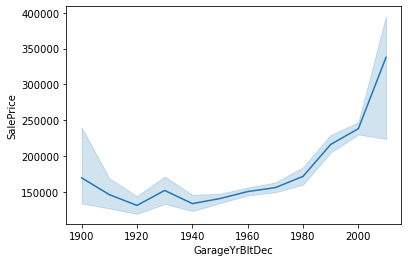

In [28]:
# Plotting a line chart using the decades
sns.lineplot(x='GarageYrBltDec',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [29]:
# Checking the correlation between garageyrblt, garageyrbltdec, and saleprice
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
GarageYrBlt       0.486362
GarageYrBltDec    0.479519
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.351799
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
E

Sorting the Years the Garage was built into decades is a very good approach. Since GarageYrBlt needs to be encoded because its a categorical feature, I reduced the number of categories from 97 to 12. Furthermore, I barely lost any correlation and got a much clearer relationship.  
  
With that being said, I am going to remove GarageYrBlt and replace it with GarageYrBltDec. Furthermore, I will replace the missing values with 0s, which indicates that there is no garage.

In [30]:
train_copy = train_copy.drop('GarageYrBlt',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2000.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1970.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2000.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1990.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1990.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1970.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1940.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [31]:
train_copy['GarageYrBltDec'] = replace_missing(train_copy, 'GarageYrBltDec','N/A')
train_copy['GarageYrBltDec'].isnull().sum()

0

##### Playing with LotFrontage and MasVnrArea

In [32]:
# Taking a look at the values in Lot Frontage
dict(train_copy['LotFrontage'].value_counts(ascending=False))

{60.0: 143,
 70.0: 70,
 80.0: 69,
 50.0: 57,
 75.0: 53,
 65.0: 44,
 85.0: 40,
 78.0: 25,
 21.0: 23,
 90.0: 23,
 68.0: 19,
 24.0: 19,
 64.0: 19,
 73.0: 18,
 72.0: 17,
 79.0: 17,
 63.0: 17,
 55.0: 17,
 100.0: 16,
 51.0: 15,
 66.0: 15,
 74.0: 15,
 52.0: 14,
 59.0: 13,
 71.0: 12,
 82.0: 12,
 40.0: 12,
 43.0: 12,
 67.0: 12,
 57.0: 12,
 69.0: 11,
 76.0: 11,
 86.0: 10,
 53.0: 10,
 34.0: 10,
 92.0: 10,
 88.0: 10,
 62.0: 9,
 44.0: 9,
 84.0: 9,
 77.0: 9,
 35.0: 9,
 93.0: 8,
 61.0: 8,
 98.0: 8,
 96.0: 8,
 107.0: 7,
 120.0: 7,
 95.0: 7,
 58.0: 7,
 41.0: 6,
 30.0: 6,
 81.0: 6,
 89.0: 6,
 105.0: 6,
 48.0: 6,
 110.0: 6,
 94.0: 6,
 54.0: 6,
 91.0: 6,
 36.0: 6,
 47.0: 5,
 37.0: 5,
 83.0: 5,
 56.0: 5,
 87.0: 5,
 32.0: 5,
 42.0: 4,
 49.0: 4,
 102.0: 4,
 103.0: 3,
 108.0: 3,
 99.0: 3,
 104.0: 3,
 45.0: 3,
 130.0: 3,
 174.0: 2,
 97.0: 2,
 134.0: 2,
 313.0: 2,
 129.0: 2,
 124.0: 2,
 118.0: 2,
 101.0: 2,
 122.0: 2,
 121.0: 2,
 115.0: 2,
 109.0: 2,
 116.0: 2,
 114.0: 2,
 150.0: 1,
 111.0: 1,
 153.0: 1,
 182.0

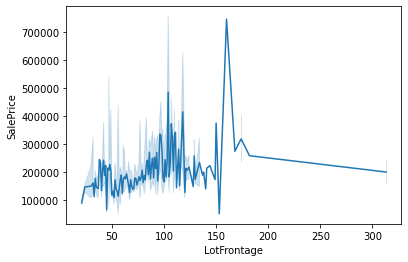

In [33]:
# Line Graph representing relationship between LotFrontage + Sale Price
sns.lineplot(x='LotFrontage',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

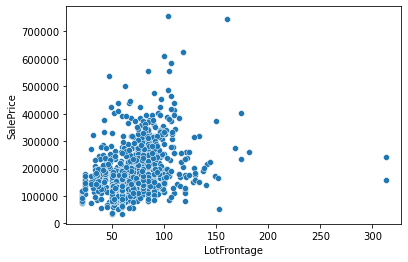

In [34]:
# Scatter Plot for relationship between LotFrontage + Sale Price
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train_copy)
plt.show()

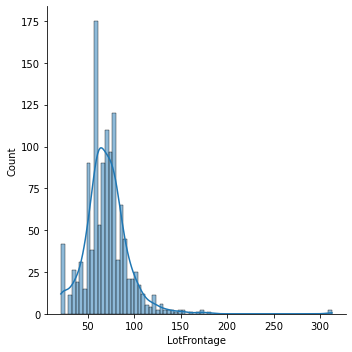

In [35]:
# Taking a look at the distribution of LotFrontage
sns.displot(x='LotFrontage',data=train_copy,kde=True)
plt.show()

In [36]:
# Checking if LotFrontage has a strong correlation with SalePrice
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [37]:
# Lot Frontage is correlated so we need to keep it. I will replace the missing values with the median
train_copy['LotFrontage'] = replace_missing(train_copy,'LotFrontage',np.nanmedian(train_copy['LotFrontage']))
train_copy['LotFrontage'].isnull().sum()

0

In [38]:
# Since the distribution for Lot Frontage is right skewed, I will log it to make it normally distributed
train_copy['LogLotFrontage'] = np.log(train_copy['LotFrontage'])
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,2000,4.174387
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,1970,4.382027
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,2000,4.219508
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,1990,4.094345
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,2000,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,175000,1990,4.127134
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2010,WD,Normal,210000,1970,4.442651
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2500,5,2010,WD,Normal,266500,1940,4.189655
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,142125,1950,4.219508


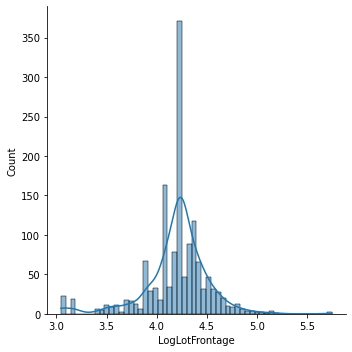

In [39]:
# Checking the new distribution of log Lot Frontage
sns.displot(x='LogLotFrontage',data=train_copy,kde=True)
plt.show()

In [40]:
# Checking to make sure we didn't lose much correlation
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.334771
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
K

Just to summarize what I did, I found that LotFrontage does have a positive,moderate correlation with SalePrice so I can't just remove it. I replaced the missing values for LotFrontage with the median because the feature is right skewed. Finally, I performed a log transformation to get the feature into a normal distribution.  
  
Note: I will remove the original Lot Frontage feature so that it can be replaced by the LogLotFrontage feature.

In [41]:
# Removing the original Lot Frontage feature
train_copy = train_copy.drop('LotFrontage',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2000,4.174387
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1970,4.382027
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2000,4.219508
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1990,4.094345
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,2000,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1990,4.127134
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1970,4.442651
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1940,4.189655
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1950,4.219508


In [42]:
# Taking a look at the values in MasVnrArea
dict(train_copy['MasVnrArea'].value_counts(ascending=False))

{0.0: 861,
 72.0: 8,
 180.0: 8,
 108.0: 8,
 120.0: 7,
 16.0: 7,
 80.0: 6,
 200.0: 6,
 106.0: 6,
 340.0: 6,
 170.0: 5,
 132.0: 5,
 360.0: 5,
 84.0: 5,
 320.0: 5,
 100.0: 4,
 196.0: 4,
 246.0: 4,
 216.0: 4,
 160.0: 4,
 183.0: 4,
 178.0: 4,
 270.0: 4,
 300.0: 4,
 210.0: 4,
 268.0: 4,
 252.0: 4,
 168.0: 4,
 336.0: 4,
 220.0: 4,
 76.0: 4,
 288.0: 4,
 456.0: 4,
 40.0: 4,
 50.0: 3,
 130.0: 3,
 82.0: 3,
 208.0: 3,
 90.0: 3,
 70.0: 3,
 44.0: 3,
 420.0: 3,
 99.0: 3,
 110.0: 3,
 104.0: 3,
 85.0: 3,
 272.0: 3,
 226.0: 3,
 174.0: 3,
 240.0: 3,
 186.0: 3,
 169.0: 3,
 148.0: 3,
 350.0: 3,
 128.0: 3,
 176.0: 3,
 166.0: 3,
 116.0: 3,
 136.0: 3,
 312.0: 3,
 256.0: 3,
 145.0: 3,
 74.0: 3,
 42.0: 3,
 98.0: 2,
 66.0: 2,
 660.0: 2,
 243.0: 2,
 338.0: 2,
 143.0: 2,
 318.0: 2,
 285.0: 2,
 162.0: 2,
 172.0: 2,
 245.0: 2,
 101.0: 2,
 344.0: 2,
 112.0: 2,
 147.0: 2,
 284.0: 2,
 472.0: 2,
 215.0: 2,
 212.0: 2,
 18.0: 2,
 205.0: 2,
 362.0: 2,
 140.0: 2,
 304.0: 2,
 232.0: 2,
 94.0: 2,
 125.0: 2,
 192.0: 2,
 164.0:

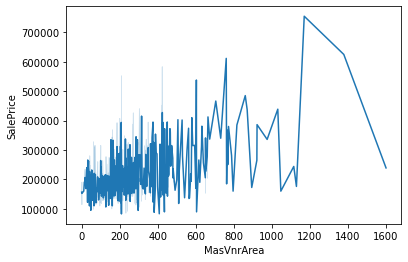

In [43]:
# Plot a line chart to see relationship between MasVnrArea & SalePrice
sns.lineplot(x='MasVnrArea',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

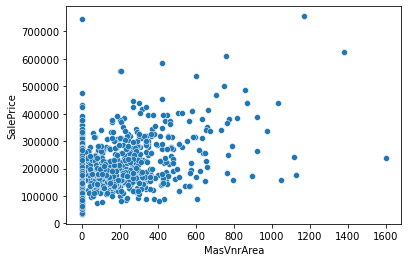

In [44]:
# Plot a scatter plot to see relationship between MasVnrArea & SalePrice
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=train_copy)
plt.show()

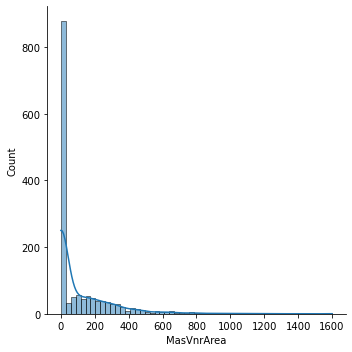

In [45]:
# Taking a look at the distribution of MasVnrArea
sns.displot(x='MasVnrArea',data=train_copy,kde=True)
plt.show()

In [46]:
# Taking a look at the correlation
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
N

In [47]:
# Replace the missing values in MasVnrArea with the median
train_copy['MasVnrArea'] = replace_missing(train_copy,'MasVnrArea',np.nanmedian(train_copy['MasVnrArea']))
train_copy['MasVnrArea'].isnull().sum()

0

In [48]:
# Looking at the correlations after replacing the missing values
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.472614
Fireplaces        0.466929
BsmtFinSF1        0.386420
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
N

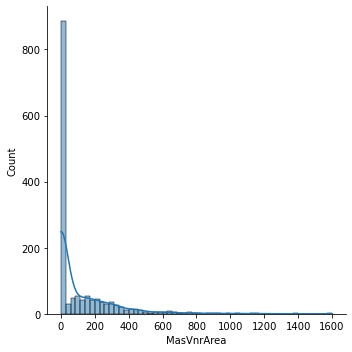

In [49]:
# Looking at the distribution after fixing the missing values
sns.displot(x='MasVnrArea',data=train_copy,kde=True)
plt.show()

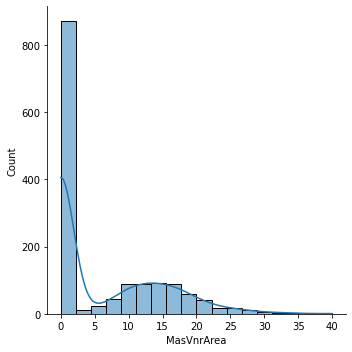

In [50]:
# Testing transformations on MasVnrArea
temp = train_copy['MasVnrArea'] ** .5
sns.displot(temp,kde=True)
plt.show()

In [51]:
# Applying Sqrt Function
train_copy['SqrtMasVnrArea'] = train_copy['MasVnrArea'] ** .5
train_copy = train_copy.drop('MasVnrArea',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950,4.219508,0.000000


Explanations for above:
* I found that MasVnrArea is important as it has a positive, moderate correlation with Sale Price. Therefore, I must keep it.
* I replaced the missing values in MasVnrArea with the median because the feature is heavily skewed.
* In order to transform MasVnrArea into a normal distribution, I applied a sqrt transformation.
* It is important to note that this data has a "floor". In other words, there is cap on low this feature's values can be. In this case the floor is 0, which is fine because we can't have negative MasVnrArea anyway. 
* I replaced the original feature with the sqrt feature to have a more distribution of values.

#### Working with the object features with missing values

In [52]:
# Printing out missing_obj
missing_obj

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

##### Dealing with all the Basement related features

In [53]:
# Exploring BsmtQual
train_copy['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

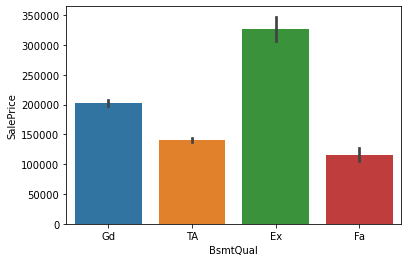

In [57]:
# Plotting the relationship between BsmtQual & SalePrice
sns.barplot(x='BsmtQual',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [59]:
# Since BsmtQual plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtQual'] = replace_missing(train_copy,'BsmtQual','N/A')
train_copy['BsmtQual'].isnull().sum()

0

In [60]:
# Looking at the BsmtCond feature
train_copy['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

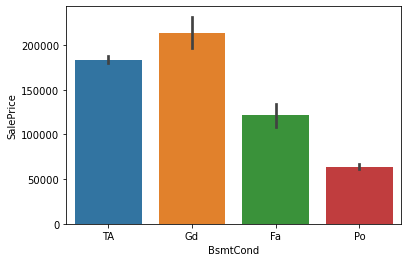

In [64]:
# Plotting the relationship between BsmtCond & SalePrice
sns.barplot(x='BsmtCond',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [65]:
# Since BsmtCond plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtCond'] = replace_missing(train_copy,'BsmtCond','N/A')
train_copy['BsmtCond'].isnull().sum()

0

In [66]:
# Exploring BsmtExposure
train_copy['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

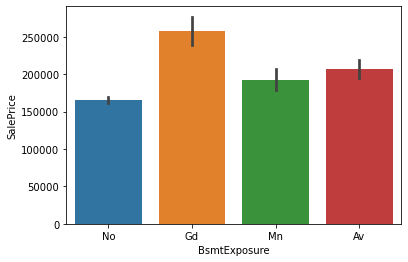

In [69]:
# Plotting the relationship between BsmtExposure & SalePrice
sns.barplot(x='BsmtExposure',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [70]:
# Since BsmtExposure plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtExposure'] = replace_missing(train_copy,'BsmtExposure','N/A')
train_copy['BsmtExposure'].isnull().sum()

0

In [71]:
# Exploring the BsmtFinType1 feature
train_copy['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

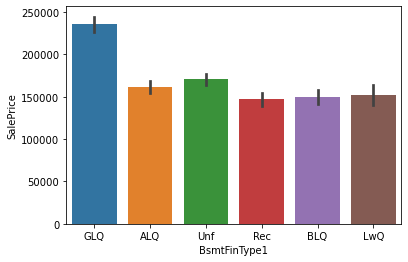

In [74]:
# Plotting the relationship between BsmtFinType1 & SalePrice
sns.barplot(x='BsmtFinType1',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [75]:
# Since BsmtExposure plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtFinType1'] = replace_missing(train_copy,'BsmtFinType1','N/A')
train_copy['BsmtFinType1'].isnull().sum()

0

In [77]:
# Exploring the BsmtFinType2 feature
train_copy['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

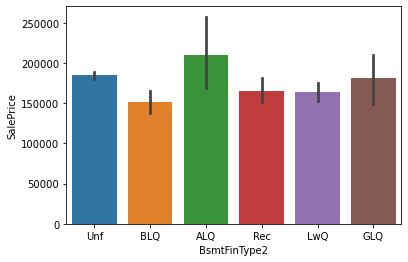

In [78]:
# Plotting the relationship between BsmtFinType2 & SalePrice
sns.barplot(x='BsmtFinType2',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [79]:
# Since BsmtFinType2 is very skewed + doesn't show a clear relationship with Sale Price, I will remove it
train_copy = train_copy.drop('BsmtFinType2',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950,4.219508,0.000000


##### Dealing with the Garage features that have missing values

In [80]:
# Exploring GarageType 
train_copy['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

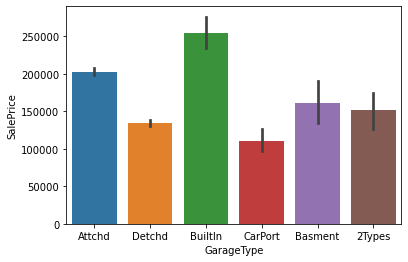

In [81]:
# Exploring GarageType's relationship with SalePrice
sns.barplot(x='GarageType',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [82]:
# Since Garage Type does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['GarageType'] = replace_missing(train_copy,'GarageType','N/A')
train_copy['GarageType'].isnull().sum()

0

In [83]:
# Exploring GarageFinish
train_copy['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

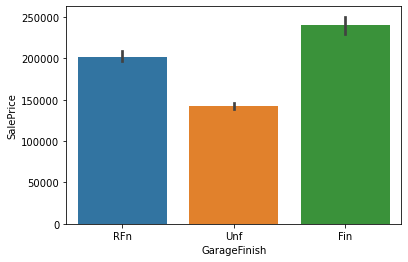

In [84]:
# Exploring GarageFinish's relationship with SalePrice
sns.barplot(x='GarageFinish',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [85]:
# Since Garage Finish does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['GarageFinish'] = replace_missing(train_copy,'GarageFinish','N/A')
train_copy['GarageFinish'].isnull().sum()

0

In [86]:
# Exploring GarageQual 
train_copy['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

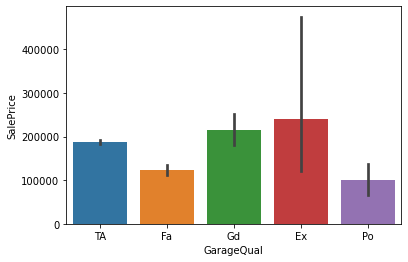

In [87]:
# Exploring GarageQual's relationship with SalePrice
sns.barplot(x='GarageQual',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [88]:
# Since GarageQual is very skewed, I will remove it
train_copy = train_copy.drop('GarageQual',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950,4.219508,0.000000


In [89]:
# Exploring GarageCond 
train_copy['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [90]:
# Since GarageCond is very skewed, I will remove it
train_copy = train_copy.drop('GarageCond',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950,4.219508,0.000000


##### Exploring the remaining object features with missing values

In [91]:
# Exploring MasVnrType
train_copy['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

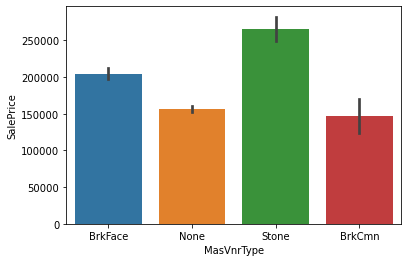

In [92]:
# Exploring MasVnrType's relationship with SalePrice
sns.barplot(x='MasVnrType',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [94]:
# Since MasVnrType does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['MasVnrType'] = replace_missing(train_copy,'MasVnrType','None')
train_copy['MasVnrType'].isnull().sum()

0

In [95]:
# Exploring Electrical
train_copy['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [96]:
# Since Electrical is very skewed, I will remove it
train_copy = train_copy.drop('Electrical',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950,4.219508,0.000000


In [97]:
# Final Check to see that there are no missing values
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.0,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 0.0,
 'BsmtCond': 0.0,
 'BsmtExposure': 0.0,
 'BsmtFinType1': 0.0,
 'BsmtFinSF1': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': 0.0,
 'KitchenAbvGr': 0.0,
 'KitchenQual': 0.0,
 'TotRmsAbvGrd': 0.0,
 'Functional': 0.0,
 

Final remarks for this subsection:
* In this subsection, I dealt with all missing values how I saw fit.
* I added + subtracted features to make an improved dataset for my machine learning models

### Taking a Look at the Data as a whole

In [100]:
# Getting information about each feature
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  YearBuilt       1460 non-null   i

In [101]:
# Splitting the features by the data type
obj_features = []
num_features =[]

for i in train_copy.keys():
    if train_copy[i].dtype == 'object':
        obj_features.append(i)
    else:
        num_features.append(i)
        
# Printing out the lists
obj_features, num_features

(['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'PavedDrive',
  'SaleType',
  'SaleCondition',
  'GarageYrBltDec'],
 ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  '